# Exercise 2 | TKO_7092 Evaluation of Machine Learning Methods 2025
## deadline: 12.2.2025 - 23:59

Regarding any questions about this exercise, please contact course assistant Jonne Pohjankukka (jjepoh@utu.fi)

********************************************

Student name: Henrik Heinonen

Student number: HIDDEN

Student email: HIDDEN

********************************************

## Water permeability prediction in forestry <br>

In this task, the client wants you to estimate the spatial prediction performance of K-nearest neighbor regression model with K=7 (7NN), using spatial leave-one-out cross-validation (i.e. SKCV, with number of folds == number of data points). The client wants you to use the C-index as the performance measure.  

In other words, the client wants you to answer the question: "What happens to the prediction performance of water permeability using 7-nearest neighbor regression model, when the geographical distance between known data and unknown data increases?".

In this task, you have three data files available (with 1691 data points):

- input.csv, contains the 75 predictor features.
- output.csv, contains the water permebility values.
- coordinates.csv, contains the corresponding geographical coordinate locations of the data points. The unit of the coordinates is metre, and you can use Euclidean distance to calculate distances between the coordinate points.

Implement the following tasks to complete this exercise:

********************************************

#### 1. Z-score standardize the predictor features (input.csv).

#### 2. Perform spatial leave-one-out cross-validation with 7NN model for the provided data set (refer to the lectures 3.1.3 and 3.1.4 in 'Evaluating spatial models with spatial cross-validation' for help). Estimate the water permeability prediction performance (using 7NN model and C-index) with the following distance parameter values: d = 0, 20, 40, ..., 300 (that is, 20 meter intervals from 0m to 300m).

#### 3. When you have calculated the C-index performance measure for each value of d, visualize the results with the C-index (y-axis) as a function of d (x-axis).

********************************************

Your .ipynb-file must include the following:

- Your own implementation of the spatial leave-one-out cross-validation for the current task. You can use third-party libraries (e.g. Scikit-learn) if you want for implementing e.g. the 7-nearest neighbor. Also, try to follow good programming practices and add comments to relevant parts of your code explaining what you are doing and why.


- Plot of the graph C-index vs. distance parameter value.


<br><br><br>
-- START IMPLEMENTING YOUR EXERCISE AFTER THIS LINE --
<br><br><br>

### mount drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import somersd
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Read in the datasets

In [3]:
# In this cell, read the files input.csv, output.csv and coordinates.csv.
# Print out the dataset dimesions (i.e. number of rows and columns).

#### input.csv

In [4]:
# Read the file input.csv
inputs = pd.read_csv('/content/drive/MyDrive/datasets/ELEM_2/input.csv', header=None) # there is no header
print(f'Rows: {inputs.shape[0]}, Columns: {inputs.shape[1]}')
inputs.head(5)

Rows: 1691, Columns: 75


,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,-0.053196,-0.219296,0.210020,0.704425,0.339477,0.412638,0.331074,-0.034411,-0.184481,0.307345,...,0.219541,0.539119,-0.645254,-0.519918,-0.447089,0.554097,0.087285,-0.109193,-0.913639,-0.461479
1,-0.632098,-0.682804,-0.285522,-0.369542,-0.138305,2.489725,2.051755,-0.034411,-0.246906,-0.226797,...,0.219541,-0.169259,-0.645254,2.475438,-0.447089,-0.288927,-0.035919,-1.481978,-1.087664,-0.461479
2,-0.674980,-0.597421,-0.568689,-0.983237,-0.828435,-0.496087,-0.451053,-0.034411,-0.324938,-0.627405,...,-1.047724,-0.877636,-0.645254,-0.519918,-0.447089,-0.375320,-0.159124,0.349947,0.134707,-0.809315
3,-0.331927,-0.154649,1.307292,0.090730,0.419107,1.061728,0.956776,-0.034411,-0.301529,-0.360333,...,-1.047724,-0.877636,-0.645254,-0.519918,-0.447089,-0.383278,0.703308,0.467238,0.107450,-0.832933
4,-0.610657,-0.673046,-0.161636,-0.522966,-0.377196,0.672274,0.800351,-0.034411,-0.363954,-0.961244,...,-1.047724,-0.877636,2.098494,0.977760,1.960643,-0.296657,0.087285,-0.333328,-0.636876,-0.542584


#### output.csv

In [5]:
# Read the file output.csv
outputs = pd.read_csv('/content/drive/MyDrive/datasets/ELEM_2/output.csv', header=None) # there is no header
print(f'Rows: {outputs.shape[0]}, Columns: {outputs.shape[1]}')
outputs.head(5)

Rows: 1691, Columns: 1


,0
0,5.8359
1,6.2592
2,6.9041
3,6.2065
4,7.0642


#### coordinates.csv

In [6]:
# Read the file coordinates.csv
coords = pd.read_csv('/content/drive/MyDrive/datasets/ELEM_2/coordinates.csv', header=None) # there is no header
print(f'Rows: {coords.shape[0]}, Columns: {coords.shape[1]}')
coords.head(5)

Rows: 1691, Columns: 2


,0,1
0,459140.0,7524200.0
1,461590.0,7549000.0
2,462040.0,7549300.0
3,462040.0,7549300.0
4,462130.0,7549400.0


### Standardization of the predictor features (input.csv)

In [7]:
# Standardize the predictor features (input.csv) by removing the mean and scaling to unit variance.
# In other words, z-score the predictor features. You are allowed to use third-party libraries for doing this.

scaler = StandardScaler()
inputs_standardized = pd.DataFrame(scaler.fit_transform(inputs))
inputs_standardized

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,-0.053196,-0.219296,0.210020,0.704425,0.339477,0.412638,0.331074,-0.034411,-0.184481,0.307345,...,0.219541,0.539119,-0.645254,-0.519918,-0.447089,0.554097,0.087285,-0.109193,-0.913639,-0.461479
1,-0.632098,-0.682804,-0.285522,-0.369542,-0.138305,2.489725,2.051755,-0.034411,-0.246906,-0.226797,...,0.219541,-0.169259,-0.645254,2.475438,-0.447089,-0.288927,-0.035919,-1.481978,-1.087664,-0.461479
2,-0.674980,-0.597421,-0.568689,-0.983237,-0.828435,-0.496087,-0.451053,-0.034411,-0.324938,-0.627405,...,-1.047724,-0.877636,-0.645254,-0.519918,-0.447089,-0.375320,-0.159124,0.349947,0.134707,-0.809315
3,-0.331927,-0.154649,1.307292,0.090730,0.419107,1.061728,0.956776,-0.034411,-0.301529,-0.360333,...,-1.047724,-0.877636,-0.645254,-0.519918,-0.447089,-0.383278,0.703308,0.467238,0.107450,-0.832933
4,-0.610657,-0.673046,-0.161636,-0.522966,-0.377196,0.672274,0.800351,-0.034411,-0.363954,-0.961244,...,-1.047724,-0.877636,2.098494,0.977760,1.960643,-0.296657,0.087285,-0.333328,-0.636876,-0.542584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,2.316013,2.256813,-0.020053,0.551001,0.233303,-1.404813,-1.233180,-0.034411,-0.410773,-1.161547,...,0.219541,2.664890,-0.645254,-0.519918,-0.447089,-0.510368,0.333694,-0.605155,-0.869609,-1.089263
1687,-0.589216,-0.625475,-1.542075,-1.903780,-2.022890,-1.404813,-1.233180,-0.034411,-0.410773,-1.161547,...,-0.414092,1.247497,3.013076,-0.519918,-0.447089,2.831260,-0.405533,1.917122,4.751621,8.761618
1688,0.472103,0.671127,0.103833,0.397577,0.100586,-0.625905,-0.607478,-0.034411,2.835360,0.307345,...,-1.047724,3.373267,-0.645254,-0.519918,-0.447089,1.145896,1.072921,2.184146,3.527153,2.258910
1689,-0.750022,-0.734034,-1.630565,-2.057204,-2.235238,-1.404813,-1.233180,-0.034411,-0.410773,-1.161547,...,-0.414092,0.539119,-0.645254,-0.519918,-0.447089,3.594710,-0.405533,1.289039,4.411957,11.258372


#### check the standardization

Should have mean of 0 and sd of 1

In [8]:
inputs_standardized.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
count,1691.00,1691.00,1691.00,1691.00,1691.00,1691.00,1691.00,1691.00,1691.00,1691.00,...,1691.00,1691.00,1691.00,1691.00,1691.00,1691.00,1691.00,1691.00,1691.00,1691.00
mean,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,...,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.86,-0.83,-1.86,-2.21,-2.47,-1.40,-1.23,-0.03,-0.41,-1.16,...,-1.05,-0.88,-0.65,-0.52,-0.45,-1.96,-10.14,-2.10,-1.27,-2.85
25%,-0.86,-0.83,-0.80,-0.52,-0.54,-0.63,-0.92,-0.03,-0.32,-0.63,...,-0.41,-0.88,-0.65,-0.52,-0.45,-0.71,-0.16,-0.69,-0.74,-0.52
50%,-0.50,-0.56,-0.21,-0.06,0.05,-0.24,-0.14,-0.03,-0.29,-0.36,...,-0.41,-0.17,-0.65,-0.52,-0.45,-0.37,0.09,0.05,-0.20,-0.09
75%,0.64,0.74,0.81,0.70,0.74,0.41,0.64,-0.03,-0.09,0.71,...,0.22,0.54,0.27,0.23,-0.45,0.40,0.33,0.57,0.53,0.28
max,3.14,3.36,1.87,2.39,1.91,3.40,3.30,29.06,5.74,4.98,...,4.66,4.79,5.76,3.97,4.37,4.25,5.14,6.37,6.98,12.95


### Functions and analysis code

In [9]:
# Include here all the functions and other relevant code that you need in order to implement the task.

# Note! Utilize the following two functions in your implementation:

### Function for calculating C-index ###
# y: array containing true label values.
# yp: array containing the predicted label values.
def cindex(y, yp):
    n = 0
    h_num = 0
    for i in range(0, len(y)):
        t = y[i]
        p = yp[i]
        for j in range(i+1, len(y)):
            nt = y[j]
            np = yp[j]
            if (t != nt):
                n = n + 1
                if (p < np and t < nt) or (p > np and t > nt):
                    h_num += 1
                elif (p == np):
                    h_num += 0.5
    return h_num/n


### Function for calculating the pairwise spatial distances between the data points ###
# The function will return a n-by-n matrix of Euclidean distances. For example, the
# distance_matrix element at indices i,j will contain the spatial distance between
# data point i and j. Note that the element value is 0 always when i==j.
# coordinate_array: n-by-2 array containing the coordinates of the exercise data points.
def cdists(coordinate_array):
    number_of_observations = coordinate_array.shape[0] # so rows, 1691
    distance_matrix = np.zeros((number_of_observations, number_of_observations))
    for i in range(0, number_of_observations):
        distance_matrix[i, :] = np.sqrt(np.sum((coordinate_array - coordinate_array[i])**2, axis=1))
    return distance_matrix

In [10]:
dist_array = cdists(coords.values)

In [11]:
dist_array[0]

array([    0.        , 24920.72430729, 25266.97449241, ...,
       64022.74986284, 64426.31139527, 64580.18581577])

### Results for spatial leave-one-out cross-validation with 7-nearest neighbor regression model

#### algo

Perform spatial leave-one-out cross-validation with 7NN model for the provided data set (refer to the lectures 3.1.3 and 3.1.4 in 'Evaluating spatial models with spatial cross-validation' for help). Estimate the water permeability prediction performance (using 7NN model and C-index) with the following distance parameter values: d = 0, 20, 40, ..., 300 (that is, 20 meter intervals from 0m to 300m).

In [12]:

def seven_nearest_neighbours(X,Y,C,DISTANCES,nn=7) -> dict:
  ### pseudocode ###
  # d_j = j:th datapoint == A data sample contains its geographical coordinate information, its predictor features or variables, and its output value.
  # c_j = geographical coordinate of jth datapoint == location coordinates of the sample point.
  # x_k = predictor features of k:th datapoint == we refer to the predictor features of the data sample.Do not mind about the k, it means the same as j, acting as an index LOL
  # r_delta = distance parameter value
  # e = distance function (eucledian in this case)
  # y_hat = predicted values for test samples
  # D = dataset
  # V = set of cross-validation folds
  # V_i = i:th fold
  # F = prediction model
  # H = set of discarded data points
  # A = learning algorithm
  # (X, Y, C) == D == dataset

  n_samples = len(X) # n of V
  loo = LeaveOneOut()
  knn = KNeighborsRegressor(n_neighbors=7) # F

  # https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.LeaveOneOut.html

  CINDEX_SCORES = {}

  for d in DISTANCES:
    print(f"distance is {d}")
    TRUE_VALS = []
    PRED_VALS = []

    # A
    print("working...")
    for i, (train_index, test_index) in enumerate(loo.split(X)):

      # remove data points that are too close
      distance_matrix = dist_array[test_index, :]
      new_train_indices = []

      # basically H <- Union_{d_k IN V_i} {d_j IN D | e(c_j, c_k) ≤ r_delta}
      # but just collect the indices that are outside
      for k in distance_matrix:
        for i, j in enumerate(k):
          if j > d:
            new_train_indices.append(i)
      new_train_indices = np.array(new_train_indices)

      #use the gained splits from the distance calculation indices
      # F <- A(D\H)
      X_train, X_test = X[new_train_indices], X[test_index]
      Y_train, Y_test = Y[new_train_indices], Y[test_index]

      # train
      knn.fit(X_train, Y_train)

      # predict
      Y_pred = knn.predict(X_test)

      # append to lists to use for cindex calculation
      TRUE_VALS.append(Y_test[0])
      PRED_VALS.append(Y_pred[0])

      # call the custom scoring function
    c_index_value = cindex(y=TRUE_VALS, yp=PRED_VALS)
    print(f"C-index value: {c_index_value}")

    # store the scores to dict with key: distance, value: cindex score
    CINDEX_SCORES[d] = c_index_value
  return CINDEX_SCORES




CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.72 µs


In [13]:
%%time


# In this cell, run your script for the Spatial leave-One-Out cross-validation
# with 7-nearest neighbor regression model and visualize the results as
# requested in the task assignment.



X = inputs_standardized.values
Y = outputs.values
C = coords.values
DISTANCES = np.arange(0, 301, 20)

cind_scores = seven_nearest_neighbours(X=X, Y=Y, C=C, DISTANCES=DISTANCES)



distance is 0
working...
C-index value: 0.7144428547630014
distance is 20
working...
C-index value: 0.7058186773881503
distance is 40
working...
C-index value: 0.7001560205451549
distance is 60
working...
C-index value: 0.6915458423219553
distance is 80
working...
C-index value: 0.6845711149904316
distance is 100
working...
C-index value: 0.6809589838855765
distance is 120
working...
C-index value: 0.6153516096924526
distance is 140
working...
C-index value: 0.5986163238507747
distance is 160
working...
C-index value: 0.5944907738591041
distance is 180
working...
C-index value: 0.5925707902101133
distance is 200
working...
C-index value: 0.5890451038667057
distance is 220
working...
C-index value: 0.586168278202341
distance is 240
working...
C-index value: 0.5848572576501864
distance is 260
working...
C-index value: 0.5849223537053655
distance is 280
working...
C-index value: 0.5849538517965811
distance is 300
working...
C-index value: 0.5842230960803775


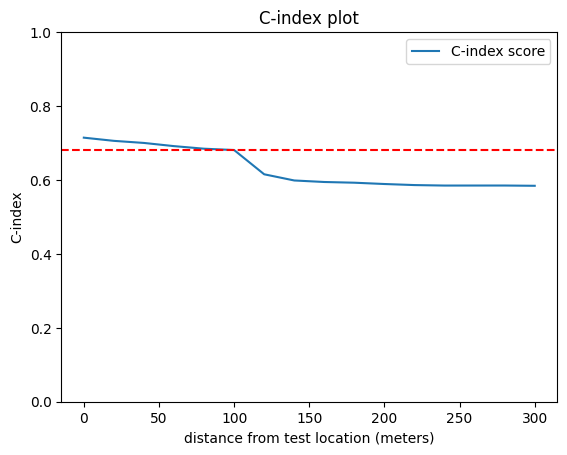

In [25]:
plt.plot(cind_scores.keys(), cind_scores.values(),label='C-index score')
plt.xlabel('distance from test location (meters)')
plt.ylabel('C-index')
plt.ylim(0, 1)
plt.axhline(y=0.68, ls = '--', color = 'r')
plt.title('C-index plot')

# Show legend
plt.legend()

# Display the plot
plt.show()

## Analysis of the results

### In this cell, you need to answer the client's questions:


1. What happens to the 7NN performance as the prediction distance increases?


2. Do you think the results behave as was somewhat expected? Do they make sense, why?


3. If we require that the 7NN must have at least C-index performance of 0.68, then up to what distance should we trust the 7NN predictions, based on the results?